In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, MaxAbsScaler, LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree

In [2]:
source = 'https://raw.githubusercontent.com/nparis87/MachineLearning/main/Complete.csv'

data = pd.read_csv(source, sep=';')

data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Set
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Train
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Train
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Train
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Train
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Train


In [3]:
data.drop(['Set'], axis = 1, inplace = True)


## Haciendo una conversión de variables ordinales manualmente y personalizada

In [4]:
label = list(data['Spending_Score'].unique()) # se crea una lista con las etiquetas
num = [1,2,3] # lista de valores numéricos para cada etiqueta
mapping = {}  # diccionario de equivalencia entre listas

for x,y in enumerate(label):
    print(x, y)
    mapping[y] = num[x]

print(mapping)

0 Low
1 Average
2 High
{'Low': 1, 'Average': 2, 'High': 3}


In [5]:
data.Spending_Score = data.Spending_Score.map(mapping)

In [6]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,1,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,2,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,1,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,3,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,3,6.0


In [20]:
X = data.drop(['Spending_Score', 'ID'], axis = 1)
X = pd.get_dummies(X)
Y = data[['Spending_Score']]
#X = data[['Gender']]

In [30]:
Y = LabelEncoder().fit_transform(Y)

tareas = [('imputer', SimpleImputer(strategy='most_frequent'))]

X2 = Pipeline(tareas).fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X2,Y, random_state = 2)                           

tree = DecisionTreeClassifier(random_state=0, max_depth=6, criterion='entropy')

tree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

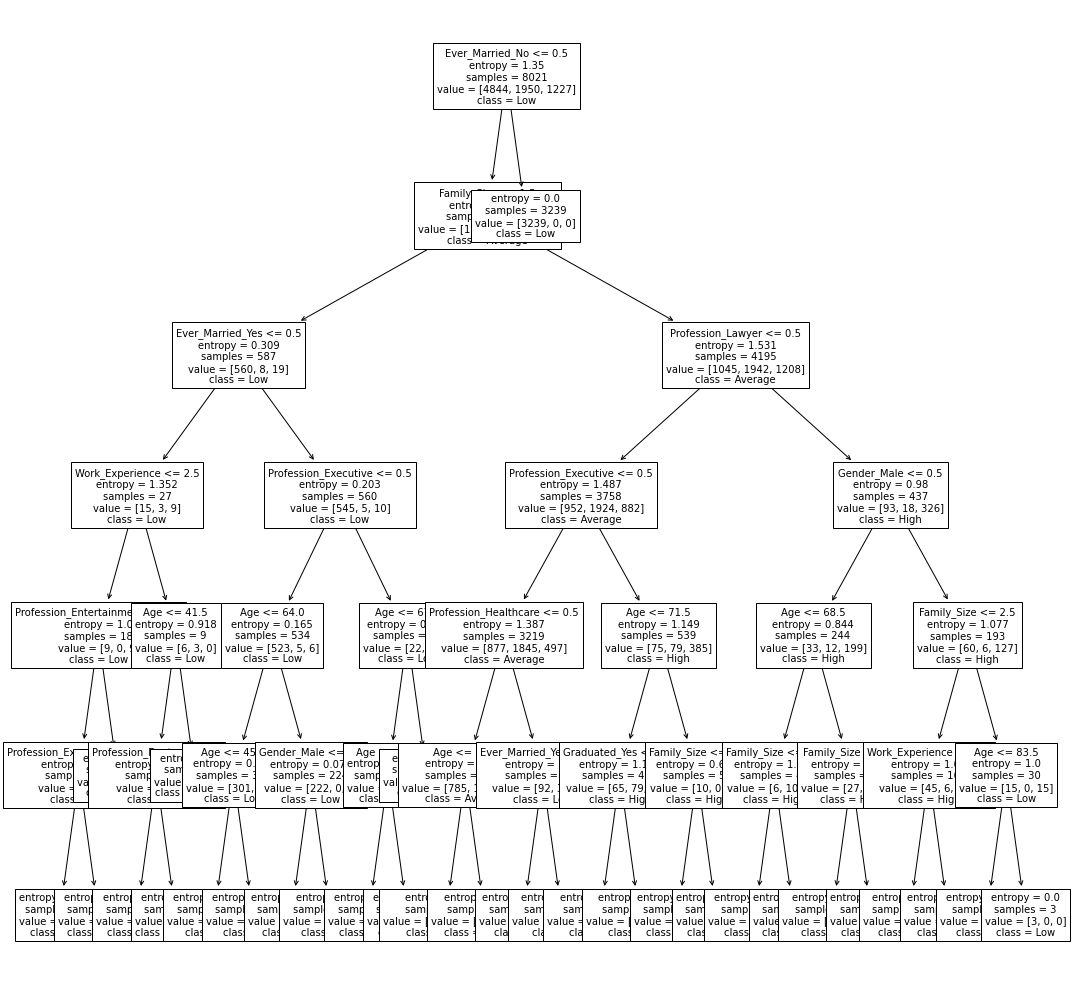

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))  # set plot size (denoted in inches)
plot_tree(tree, fontsize=10, class_names=label, feature_names=X.columns)
plt.show()

In [48]:
help(ConfusionMatrixDisplay)

Help on class ConfusionMatrixDisplay in module sklearn.metrics._plot.confusion_matrix:

class ConfusionMatrixDisplay(builtins.object)
 |  ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)
 |  
 |  Confusion Matrix visualization.
 |  
 |  It is recommend to use :func:`~sklearn.metrics.plot_confusion_matrix` to
 |  create a :class:`ConfusionMatrixDisplay`. All parameters are stored as
 |  attributes.
 |  
 |  Read more in the :ref:`User Guide <visualizations>`.
 |  
 |  Parameters
 |  ----------
 |  confusion_matrix : ndarray of shape (n_classes, n_classes)
 |      Confusion matrix.
 |  
 |  display_labels : ndarray of shape (n_classes,), default=None
 |      Display labels for plot. If None, display labels are set from 0 to
 |      `n_classes - 1`.
 |  
 |  Attributes
 |  ----------
 |  im_ : matplotlib AxesImage
 |      Image representing the confusion matrix.
 |  
 |  text_ : ndarray of shape (n_classes, n_classes), dtype=matplotlib Text,             or None
 |      Arr

# Coeficiente de Gini

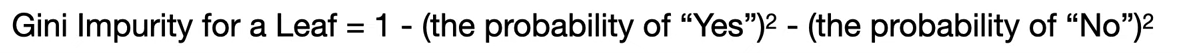



# Entropía - Valor esperado de la sorpresa

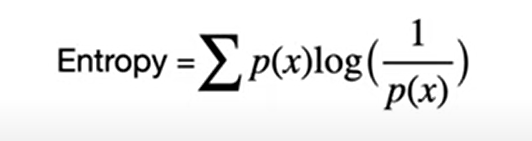

## Trabajo en clase 25 minutos

Encontrar el mejor F1 score probando Gini, entropía y máxima profundidad del árbol (probar entre 3 y 8 nodos)

Gini vs entropía con:
4 nodos
6 nodos
8 nodos

Comparar resultados con clasificación Knn

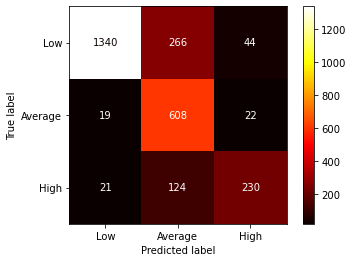

In [51]:
plot_confusion_matrix(tree, x_test, y_test, display_labels=label,values_format='d',cmap='hot')

In [23]:
tree_pred = tree.predict(x_test)
knn_pred = knn.predict(x_test)
print('TREE RESULTS')
print(classification_report(y_test, tree_pred,target_names=label))


TREE RESULTS
              precision    recall  f1-score   support

         Low       0.95      0.81      0.88      1650
     Average       0.62      0.88      0.73       649
        High       0.69      0.63      0.66       375

    accuracy                           0.80      2674
   macro avg       0.75      0.78      0.75      2674
weighted avg       0.84      0.80      0.81      2674

KNN RESULTS
              precision    recall  f1-score   support

         Low       0.82      0.85      0.84      1650
     Average       0.61      0.60      0.60       649
        High       0.63      0.52      0.57       375

    accuracy                           0.75      2674
   macro avg       0.69      0.66      0.67      2674
weighted avg       0.74      0.75      0.74      2674

